# Healthcare Fraud Detection

## Overview

In this project, we will delve into anomaly detection within healthcare data, focusing on identifying unusual patterns or outliers that could signify potential health issues, fraudulent activities, or errors in the data. Through a comprehensive Exploratory Data Analysis (EDA) process, we aim to uncover hidden anomalies and understand their significance in the healthcare domain. By leveraging data visualization techniques and robust analysis methodologies, we seek to extract actionable insights that can aid in early detection, prevention, and intervention strategies.
Our ultimate goal is to discern the factors influencing anomalies within healthcare data and develop effective anomaly detection models to safeguard patient health, ensure data integrity, and optimize healthcare operations.

### Dataset Info


The dataset is an imaginary collection of healthcare fraud records, comprising 1,000,000 entries. It features fields such as Provider ID, Claim ID, Patient ID, Diagnosis Code, Claim Amount, Paid Amount, and more. Values for Claim Amount, Paid Amount, Coverage Amount, and Total Charges are generated randomly between 100 and 10,000.

### Importing Libraries

In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [10]:
df = pd.read_csv('Healthcare_Fraud_Imaginary_Asia_Dataset.csv')

In [11]:
df.shape

(1000000, 29)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Provider_ID            1000000 non-null  object 
 1   Claim_ID               1000000 non-null  object 
 2   Patient_ID             1000000 non-null  object 
 3   Diagnosis_Code         1000000 non-null  object 
 4   Procedure_Code         1000000 non-null  object 
 5   Claim_Date             1000000 non-null  object 
 6   Admission_Date         1000000 non-null  object 
 7   Discharge_Date         1000000 non-null  object 
 8   Claim_Amount           1000000 non-null  float64
 9   Paid_Amount            1000000 non-null  float64
 10  Provider_Specialty     1000000 non-null  object 
 11  Patient_Age            1000000 non-null  int64  
 12  Patient_Gender         1000000 non-null  object 
 13  Fraud_Label            1000000 non-null  int64  
 14  Investigation_Detai

In [13]:
df.head()

Provider_ID      Claim_ID    Patient_ID   Diagnosis_Code  \
0  Asian Medical Center  CLAIM_1   Darrell Blair     DX_714       
1          Sky Hospital  CLAIM_2   William Young     DX_885       
2       Moon Healthcare  CLAIM_3  Keith Reynolds     DX_988       
3          Sky Hospital  CLAIM_4     Andre Kelly     DX_779       
4            Sun Clinic  CLAIM_5  Terry Gonzales     DX_644       

  Procedure_Code  Claim_Date Admission_Date Discharge_Date  Claim_Amount  \
0    PROC_2648    2024-04-24   2024-03-26     2024-05-08       1077.86     
1    PROC_9084    2024-04-24   2024-04-07     2024-05-03       4998.88     
2    PROC_9747    2024-04-24   2024-04-01     2024-05-24       7058.21     
3    PROC_4334    2024-04-24   2024-03-31     2024-04-27       1628.67     
4    PROC_8408    2024-04-24   2024-03-27     2024-05-12       1480.43     

   Paid_Amount Provider_Specialty  Patient_Age Patient_Gender  Fraud_Label  \
0    4362.78       Orthopedics         76          Female           1        
1    5867.30        Cardiology         73          Female           1        
2    8526.15       Orthopedics         34            Male           0        
3    8317.18        Cardiology         58            Male           0        
4    4136.33       Orthopedics         90          Female           0        

  Investigation_Details Policy_Type  Coverage_Amount  Total_Charges  \
0               Cleared      HMO         3880.49         9913.47      
1   Under investigation      PPO         1541.03         7723.89      
2               Cleared      HMO         2047.66         9671.58      
3            Suspicious      PPO         3198.92         7887.55      
4   Under investigation      PPO         2935.93          332.80      

         Payment_Type         State             Email            \
0                Credit Card  Bangkok  charlenekoch@example.org   
1                Credit Card   Mumbai  ayersmelanie@example.org   
2                Credit Card    Seoul     madison17@example.com   
3                      Check    Tokyo    brittany18@example.org   
4  Electronic Funds Transfer   Mumbai       nharris@example.net   

       Phone_Number       \
0           737.572.4230   
1  001-284-213-6827x6429   
2          (320)856-6983   
3           860-217-1502   
4           658.620.1024   

                           Address                           Nationality  \
0                  9475 Christine Fort, Riveraview, TX 28683    Korean     
1                    012 Martinez Bridge, Popeview, OK 75771    Korean     
2    8544 Roberts Estate Apt. 392, Port Mistyshire, WY 86425    Indian     
3     52151 Antonio Hill Suite 655, Lake Christian, NH 49512      Thai     
4  7112 Christopher Village Suite 120, North Emily, NJ 46503      Thai     

  Passport_Number            Employer            Occupation  Marital_Status  \
0    317-45-4815              Mitchell-Mcintosh      Teacher    Divorced      
1    255-16-5382   Galloway, Castillo and Smith  Businessman     Married      
2    255-07-5680    Phillips, Bryant and Murphy      Teacher    Divorced      
3    210-10-2570       Lee, Jackson and Hoffman       Doctor    Divorced      
4    044-28-8553      Peterson, Lopez and Blake     Engineer    Divorced      

  Education_Level  
0    High School   
1            PhD   
2         Master   
3       Bachelor   
4       Bachelor

In [14]:
df.tail()

Provider_ID         Claim_ID        Patient_ID    Diagnosis_Code  \
999995  Asian Medical Center   CLAIM_999996     Evelyn Rivers     DX_590       
999996       Moon Healthcare   CLAIM_999997      Robert Woods     DX_954       
999997            Sun Clinic   CLAIM_999998      David Thomas     DX_302       
999998  Asian Medical Center   CLAIM_999999  Samantha Hubbard     DX_517       
999999            Sun Clinic  CLAIM_1000000       Amy Edwards     DX_699       

       Procedure_Code  Claim_Date Admission_Date Discharge_Date  Claim_Amount  \
999995    PROC_1543    2024-04-24   2024-03-25     2024-05-12       9576.71     
999996    PROC_6870    2024-04-24   2024-03-26     2024-05-09       4600.56     
999997    PROC_9405    2024-04-24   2024-03-25     2024-05-20       7103.05     
999998    PROC_4916    2024-04-24   2024-04-05     2024-05-21        313.71     
999999    PROC_7914    2024-04-24   2024-03-29     2024-05-08       1540.96     

        Paid_Amount Provider_Specialty  Patient_Age Patient_Gender  \
999995    3128.20         Orthopedics       85            Male       
999996    9604.02         Orthopedics       61            Male       
999997    2955.37    General Medicine       41            Male       
999998    8483.86          Cardiology       50          Female       
999999    4121.44         Orthopedics       51            Male       

        Fraud_Label Investigation_Details Policy_Type  Coverage_Amount  \
999995       0               Cleared           HMO         1505.56       
999996       1               Cleared           PPO         4175.44       
999997       0            Suspicious           PPO         1329.91       
999998       0               Cleared           HMO         3388.07       
999999       1               Cleared           HMO         2752.81       

        Total_Charges        Payment_Type         State    \
999995     9891.99                         Check    Seoul   
999996     3968.83                         Check    Tokyo   
999997     8615.29     Electronic Funds Transfer  Bangkok   
999998     2163.77     Electronic Funds Transfer  Beijing   
999999     3194.72                         Check   Mumbai   

                 Email                Phone_Number     \
999995        khughes@example.org        405.871.5546   
999996       froberts@example.net  569-771-5484x20259   
999997  jameswilliams@example.org  (962)996-9863x7621   
999998         tsmith@example.org        423-752-9324   
999999      barbara46@example.net   313-781-4871x6894   

                              Address                         Nationality  \
999995                   129 Kelly Forges, Longland, AZ 46430       Thai    
999996     281 Judy Crescent Suite 322, North Edwin, DC 52257   Japanese    
999997  216 Michaela Rapid Suite 198, Williamsmouth, MO 10043    Chinese    
999998        26176 Joshua Skyway Apt. 043, Riceton, GA 23354       Thai    
999999             92795 Williams Mills, East Keith, MO 60890     Indian    

       Passport_Number         Employer        Occupation Marital_Status  \
999995    840-84-6763            Ross-Melendez  Engineer      Widowed      
999996    318-96-8498             Hansen Group  Engineer     Divorced      
999997    174-92-1906               Miller PLC   Teacher      Married      
999998    203-65-1589   Day, Stewart and Frost   Teacher       Single      
999999    562-34-1333              Webb-Rogers    Doctor     Divorced      

       Education_Level  
999995       Bachelor   
999996    High School   
999997       Bachelor   
999998         Master   
999999            PhD

In [15]:
df.describe()

Claim_Amount     Paid_Amount     Patient_Age     Fraud_Label   \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean      5049.924917     5023.608723       53.988752        0.499551   
std       2856.368535     2870.834799       21.079818        0.500000   
min        100.020000       50.050000       18.000000        0.000000   
25%       2577.415000     2538.360000       36.000000        0.000000   
50%       5051.705000     5023.160000       54.000000        0.000000   
75%       7522.192500     7509.830000       72.000000        1.000000   
max       9999.990000    10000.000000       90.000000        1.000000   

       Coverage_Amount   Total_Charges  
count  1000000.000000   1000000.000000  
mean      2999.730097      5047.055361  
std       1154.205850      2859.124481  
min       1000.000000       100.030000  
25%       2000.050000      2568.770000  
50%       2999.905000      5045.890000  
75%       3998.232500      7524.647500  
max       5000.000000      9999.990000

## Exploratory Data Analysis (EDA)

### Missing Values

In [16]:
df.isnull().sum()

Provider_ID              0
Claim_ID                 0
Patient_ID               0
Diagnosis_Code           0
Procedure_Code           0
Claim_Date               0
Admission_Date           0
Discharge_Date           0
Claim_Amount             0
Paid_Amount              0
Provider_Specialty       0
Patient_Age              0
Patient_Gender           0
Fraud_Label              0
Investigation_Details    0
Policy_Type              0
Coverage_Amount          0
Total_Charges            0
Payment_Type             0
State                    0
Email                    0
Phone_Number             0
Address                  0
Nationality              0
Passport_Number          0
Employer                 0
Occupation               0
Marital_Status           0
Education_Level          0
dtype: int64

### Duplicate Values

In [9]:
df.duplicated().any()

False

### Constant Values

In [10]:
constant_columns = df.columns[df.nunique() == 1]
constant_columns

Index(['Claim_Date'], dtype='object')

#### Conclusion:- Our dataset has not any null/missing/duplicate values but contains a column having constant value.
#### So, removing the column 'Claim_Date' from the dataset.

In [11]:
df = df.drop('Claim_Date', axis=1)

In [12]:
df.shape

(1000000, 28)

### Correlation Matrix Representation

In [13]:
df_corr = df.select_dtypes(include=['number']).corr()
df_corr

Claim_Amount  Paid_Amount  Patient_Age  Fraud_Label  \
Claim_Amount         1.000000    -0.000991     0.000442     0.000777   
Paid_Amount         -0.000991     1.000000     0.000114     0.000399   
Patient_Age          0.000442     0.000114     1.000000     0.000938   
Fraud_Label          0.000777     0.000399     0.000938     1.000000   
Coverage_Amount      0.001259     0.001060     0.000100     0.000471   
Total_Charges       -0.000092    -0.000206    -0.000122     0.000738   

                 Coverage_Amount  Total_Charges  
Claim_Amount            0.001259      -0.000092  
Paid_Amount             0.001060      -0.000206  
Patient_Age             0.000100      -0.000122  
Fraud_Label             0.000471       0.000738  
Coverage_Amount         1.000000       0.000197  
Total_Charges           0.000197       1.000000

#### Drawing Heatmap

Text(0.5, 1.0, 'Heatmap')

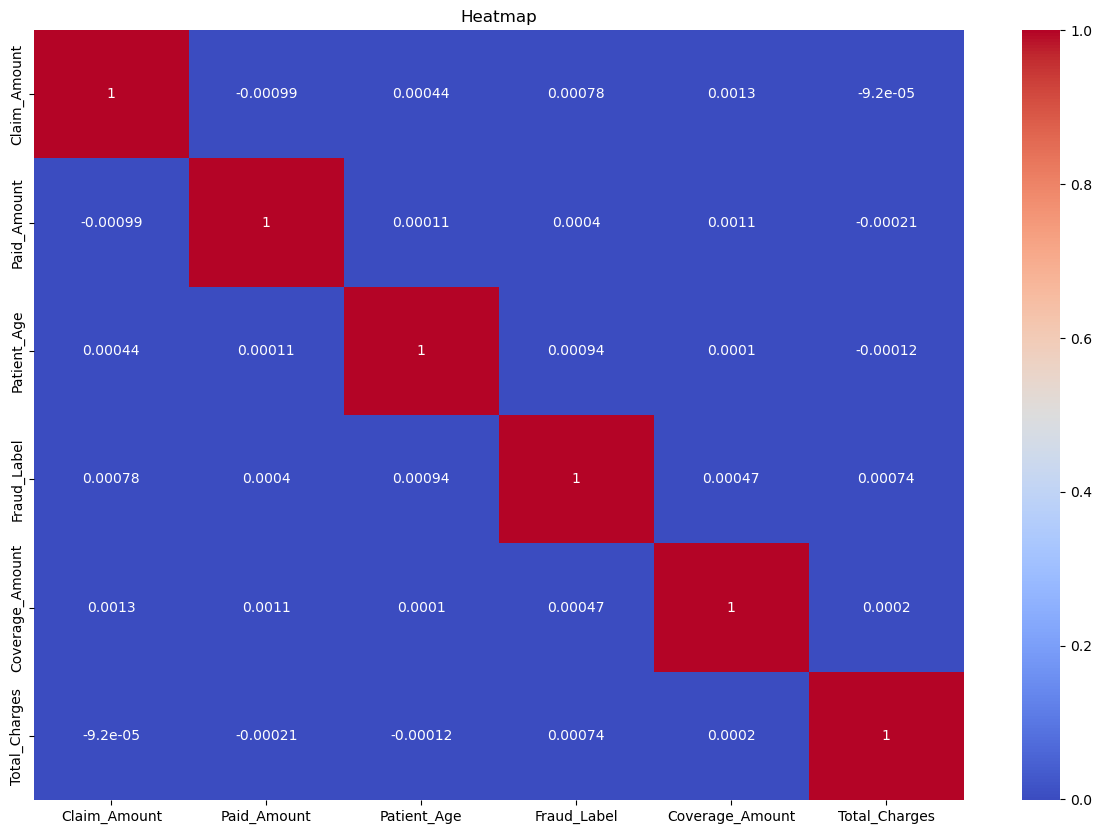

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Heatmap')

In [15]:
df.columns

Index(['Provider_ID', 'Claim_ID', 'Patient_ID', 'Diagnosis_Code',
       'Procedure_Code', 'Admission_Date', 'Discharge_Date', 'Claim_Amount',
       'Paid_Amount', 'Provider_Specialty', 'Patient_Age', 'Patient_Gender',
       'Fraud_Label', 'Investigation_Details', 'Policy_Type',
       'Coverage_Amount', 'Total_Charges', 'Payment_Type', 'State', 'Email',
       'Phone_Number', 'Address', 'Nationality', 'Passport_Number', 'Employer',
       'Occupation', 'Marital_Status', 'Education_Level'],
      dtype='object')

#### Histogram Representation

array([[<Axes: title={'center': 'Claim_Amount'}>,
        <Axes: title={'center': 'Paid_Amount'}>],
       [<Axes: title={'center': 'Patient_Age'}>,
        <Axes: title={'center': 'Fraud_Label'}>],
       [<Axes: title={'center': 'Coverage_Amount'}>,
        <Axes: title={'center': 'Total_Charges'}>]], dtype=object)

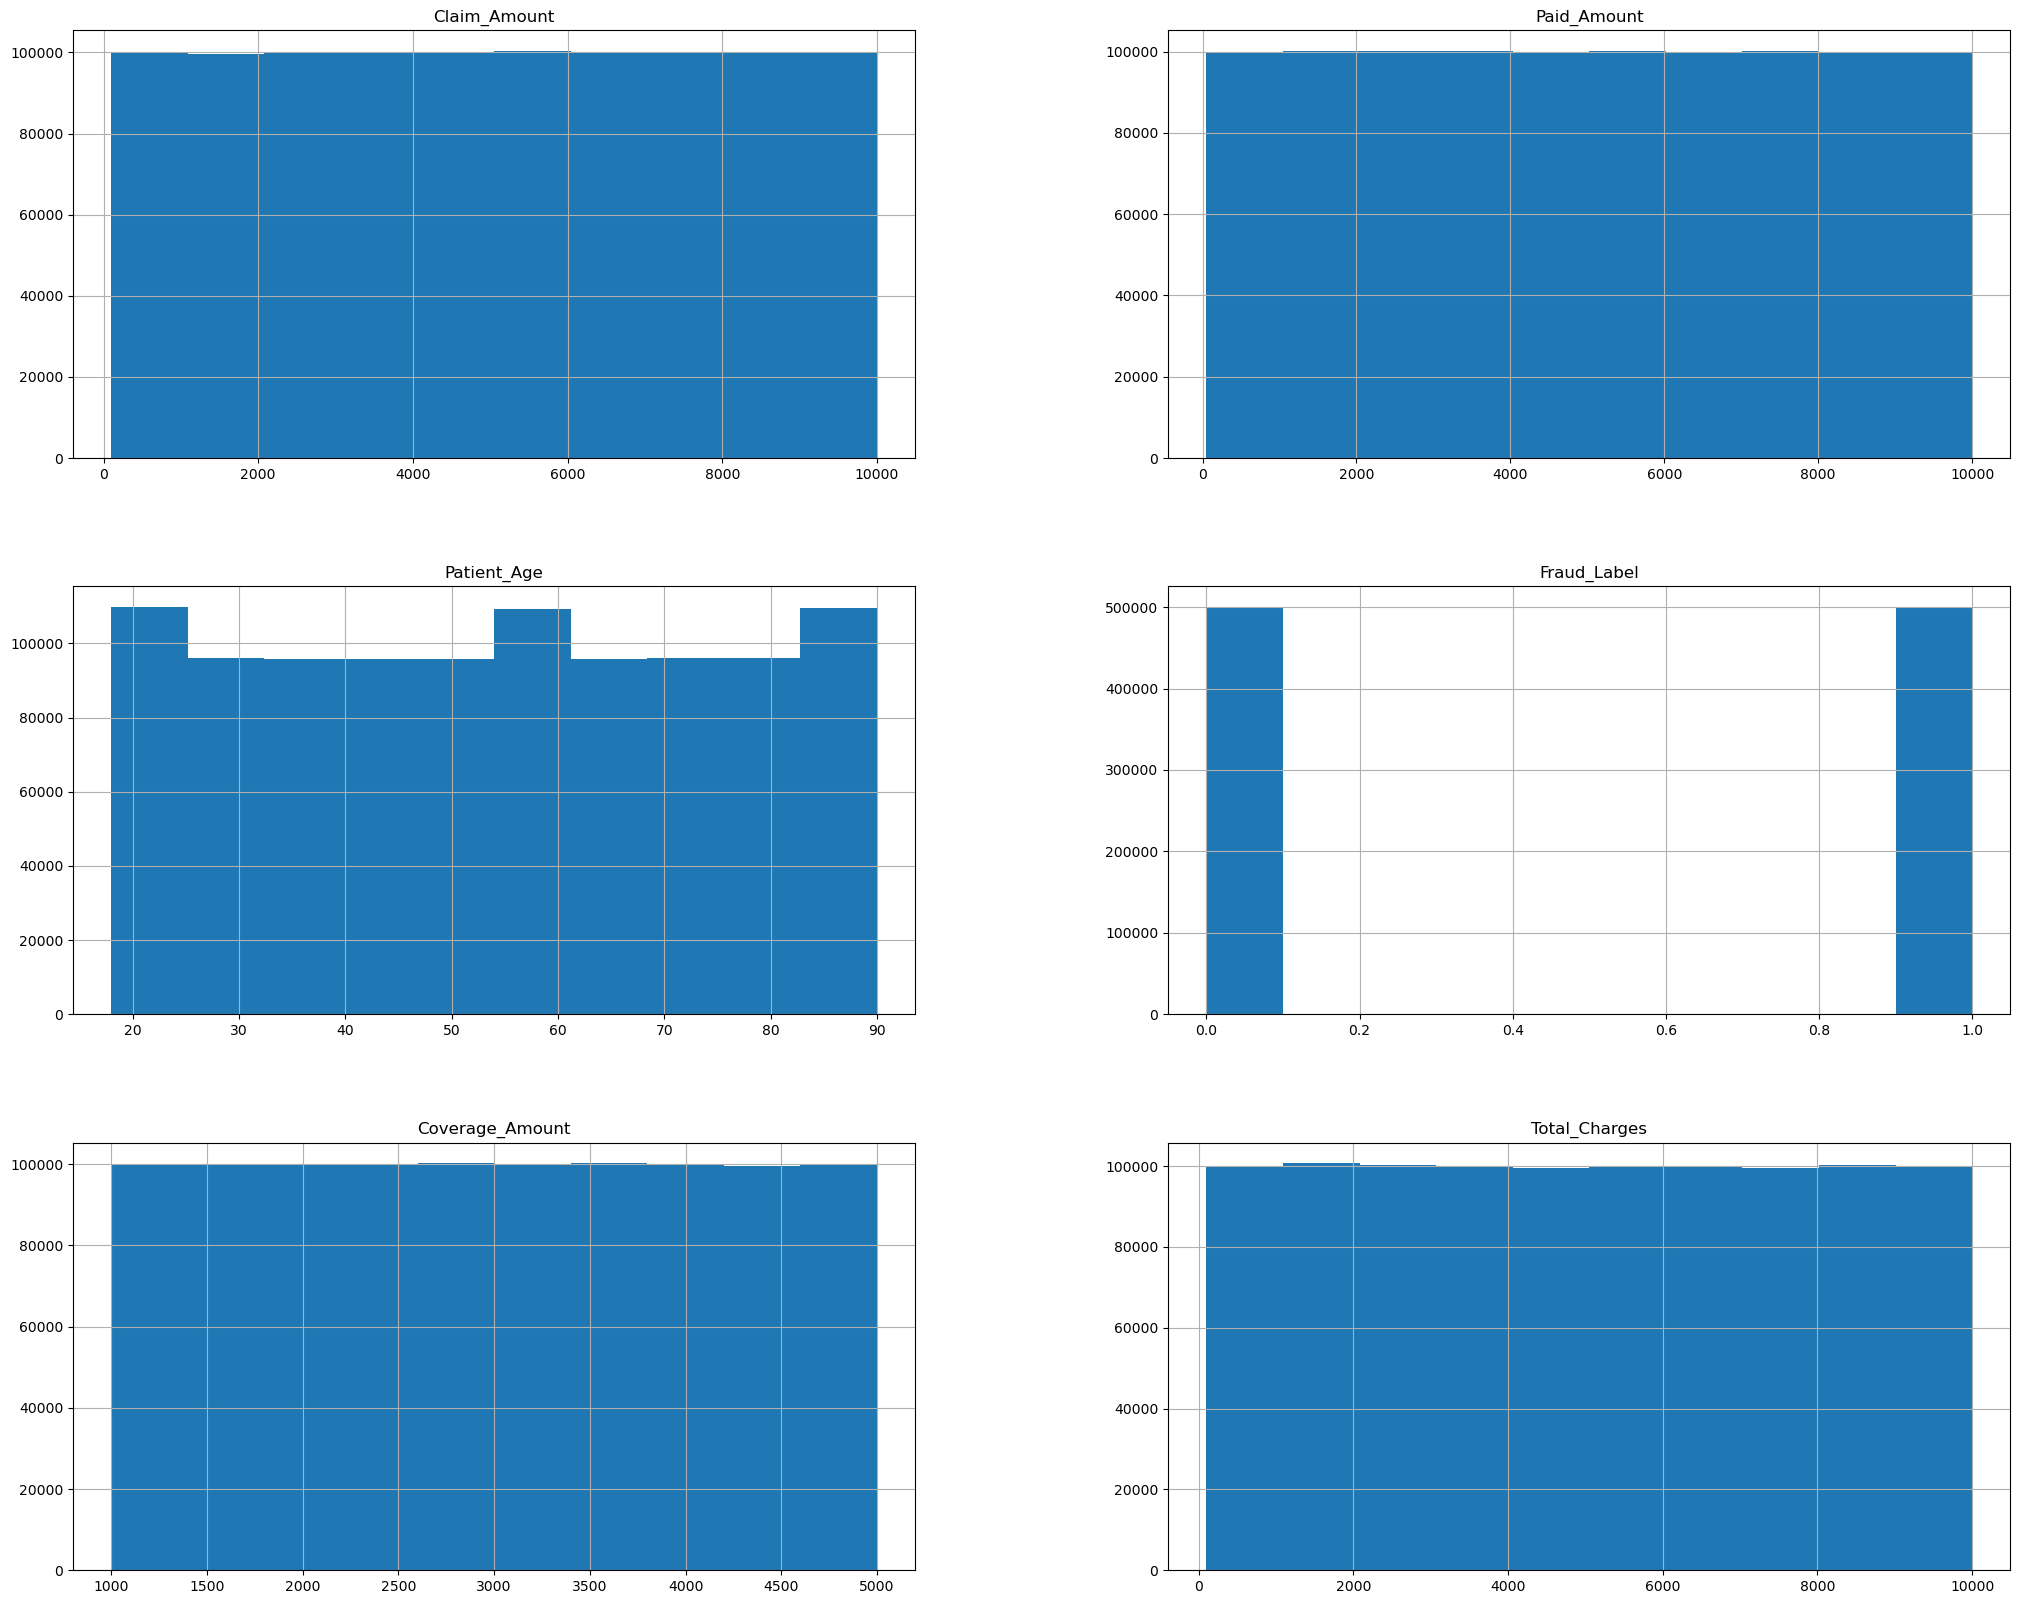

In [16]:
df.hist(figsize=(25,20))

#### Scatter Plot for all numeric columns

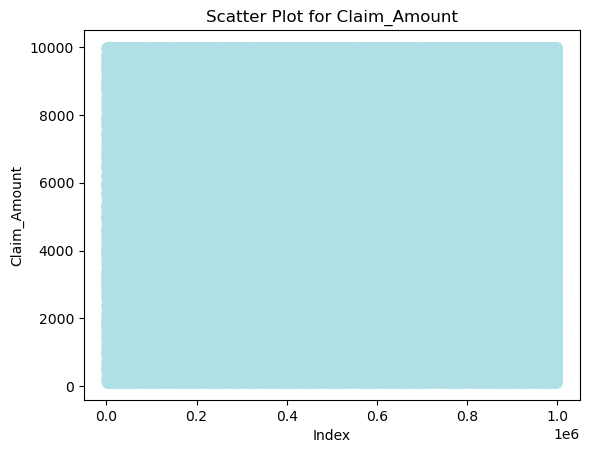

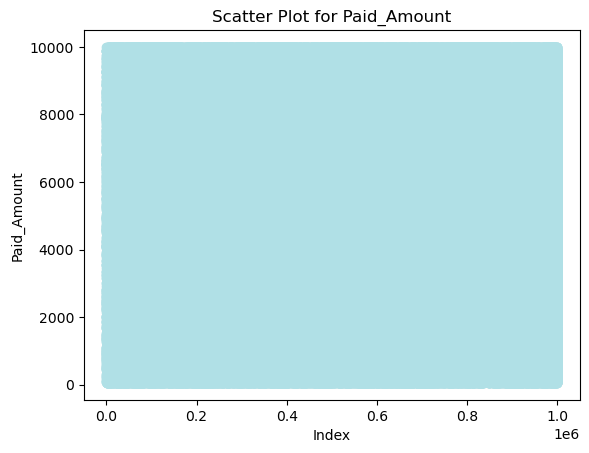

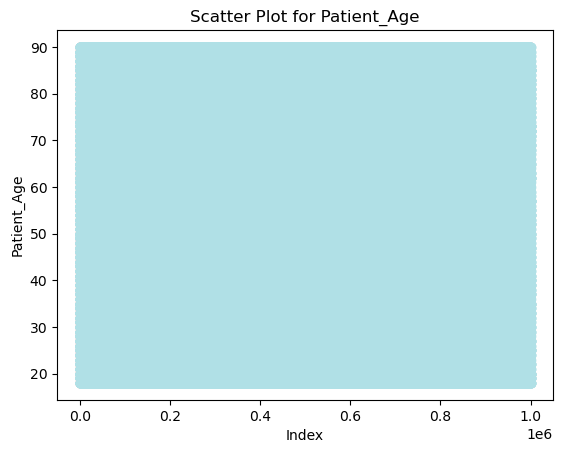

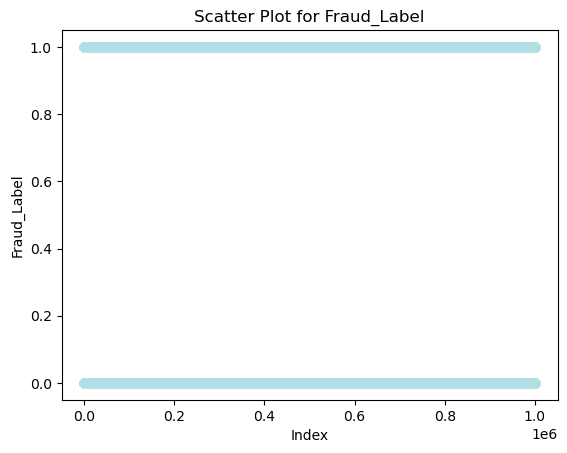

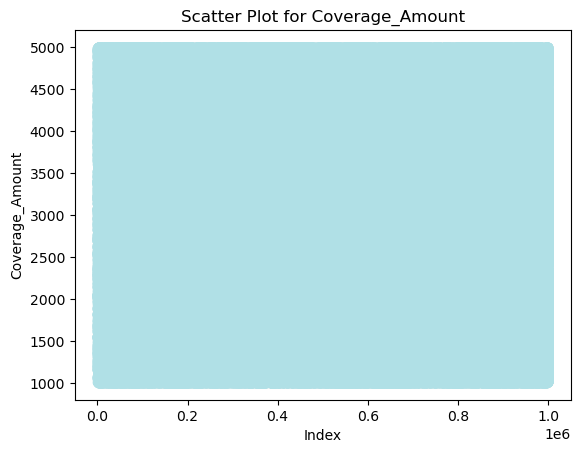

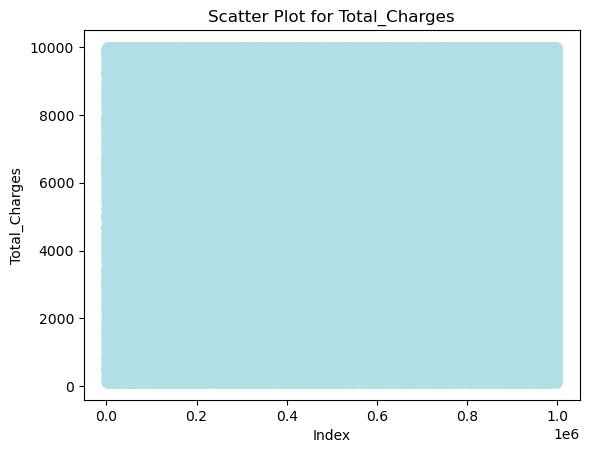

In [17]:
numerical_cols = df.select_dtypes(include=[np.number])

for col in numerical_cols.columns:
    plt.figure()
    plt.scatter(df.index, df[col], c='powderblue')
    plt.title(f"Scatter Plot for {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    
plt.show()


#### Box Plot Representation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Claim_Amount'),
  Text(1, 0, 'Paid_Amount'),
  Text(2, 0, 'Patient_Age'),
  Text(3, 0, 'Fraud_Label'),
  Text(4, 0, 'Coverage_Amount'),
  Text(5, 0, 'Total_Charges')])

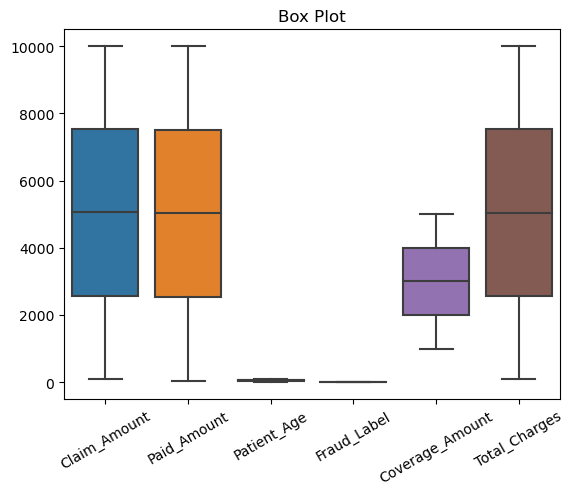

In [18]:
sns.boxplot(data=df)
plt.title('Box Plot')
plt.xticks(rotation=30)

## Automated EDA 

### Using Pandas Profiling (ydata profiling)

from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_file("ProfileReport.html")

### Using AutoViz  Library

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 29)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  13
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  3
    Number of Date Time Columns =  0
    Number of ID Columns =  3
    Number of Columns to Delete =  1
    29 Predictors classified...
        4 variable(s) removed since they were ID or low-information variables
       

Number of All Scatter Plots = 10


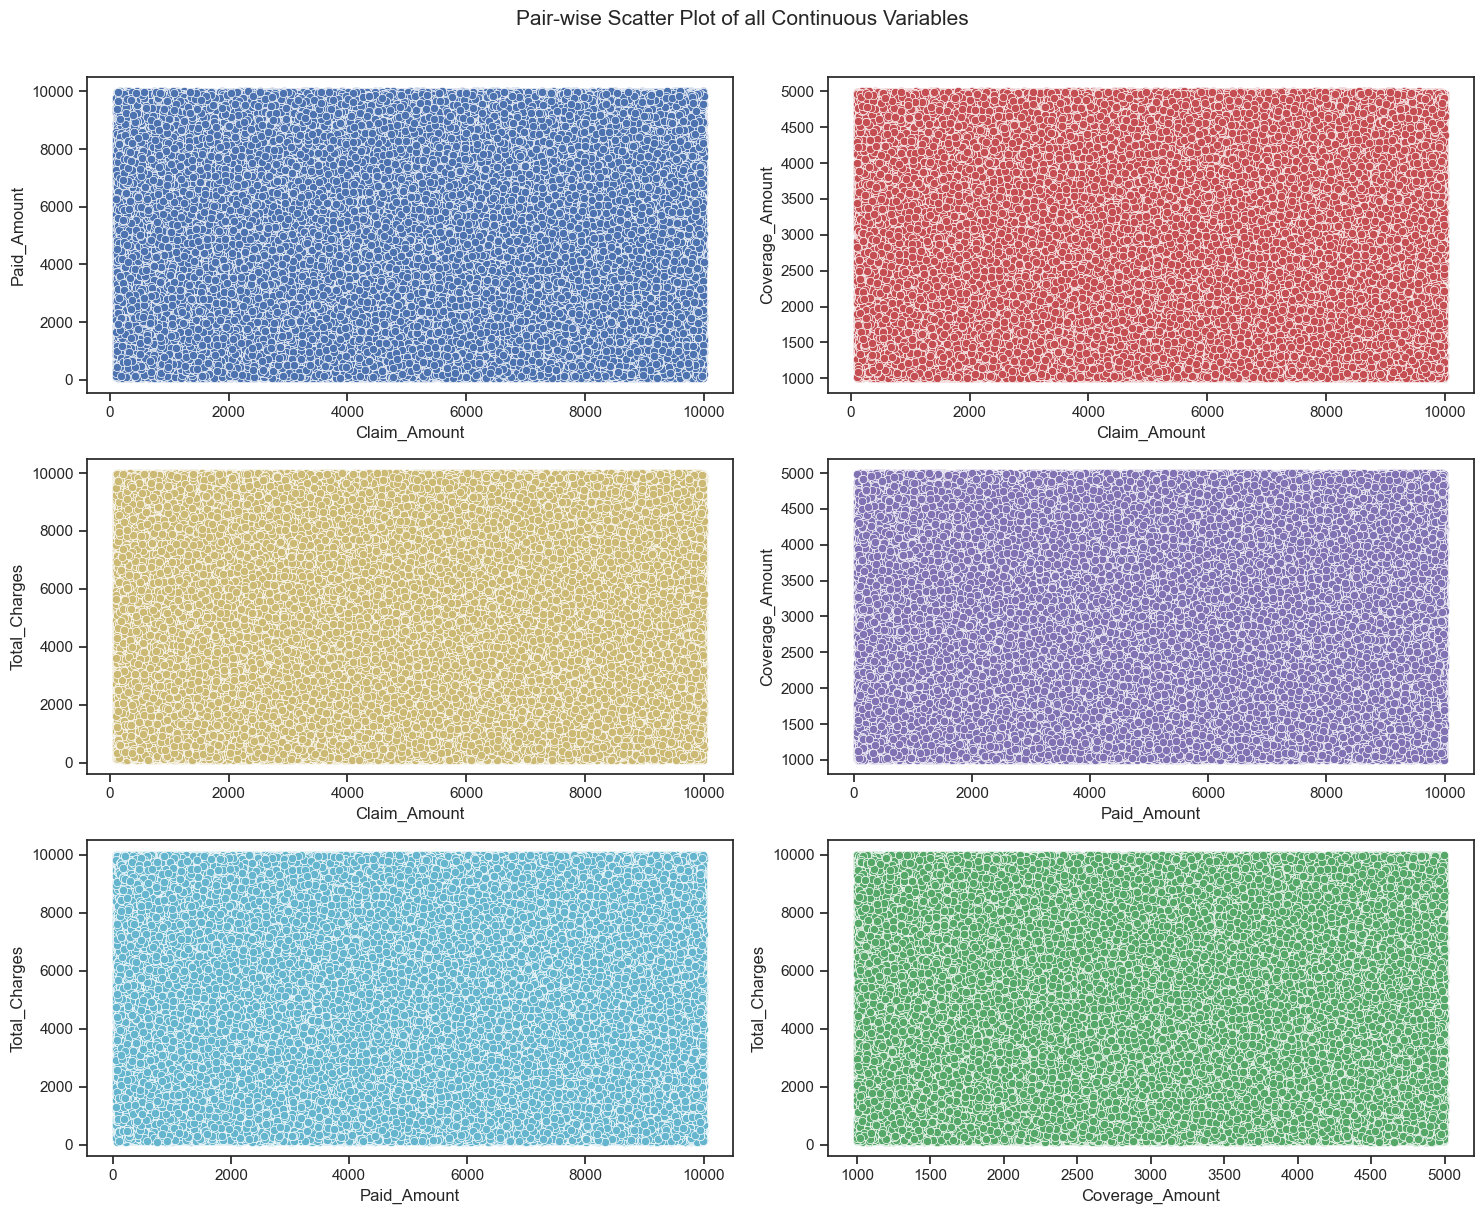

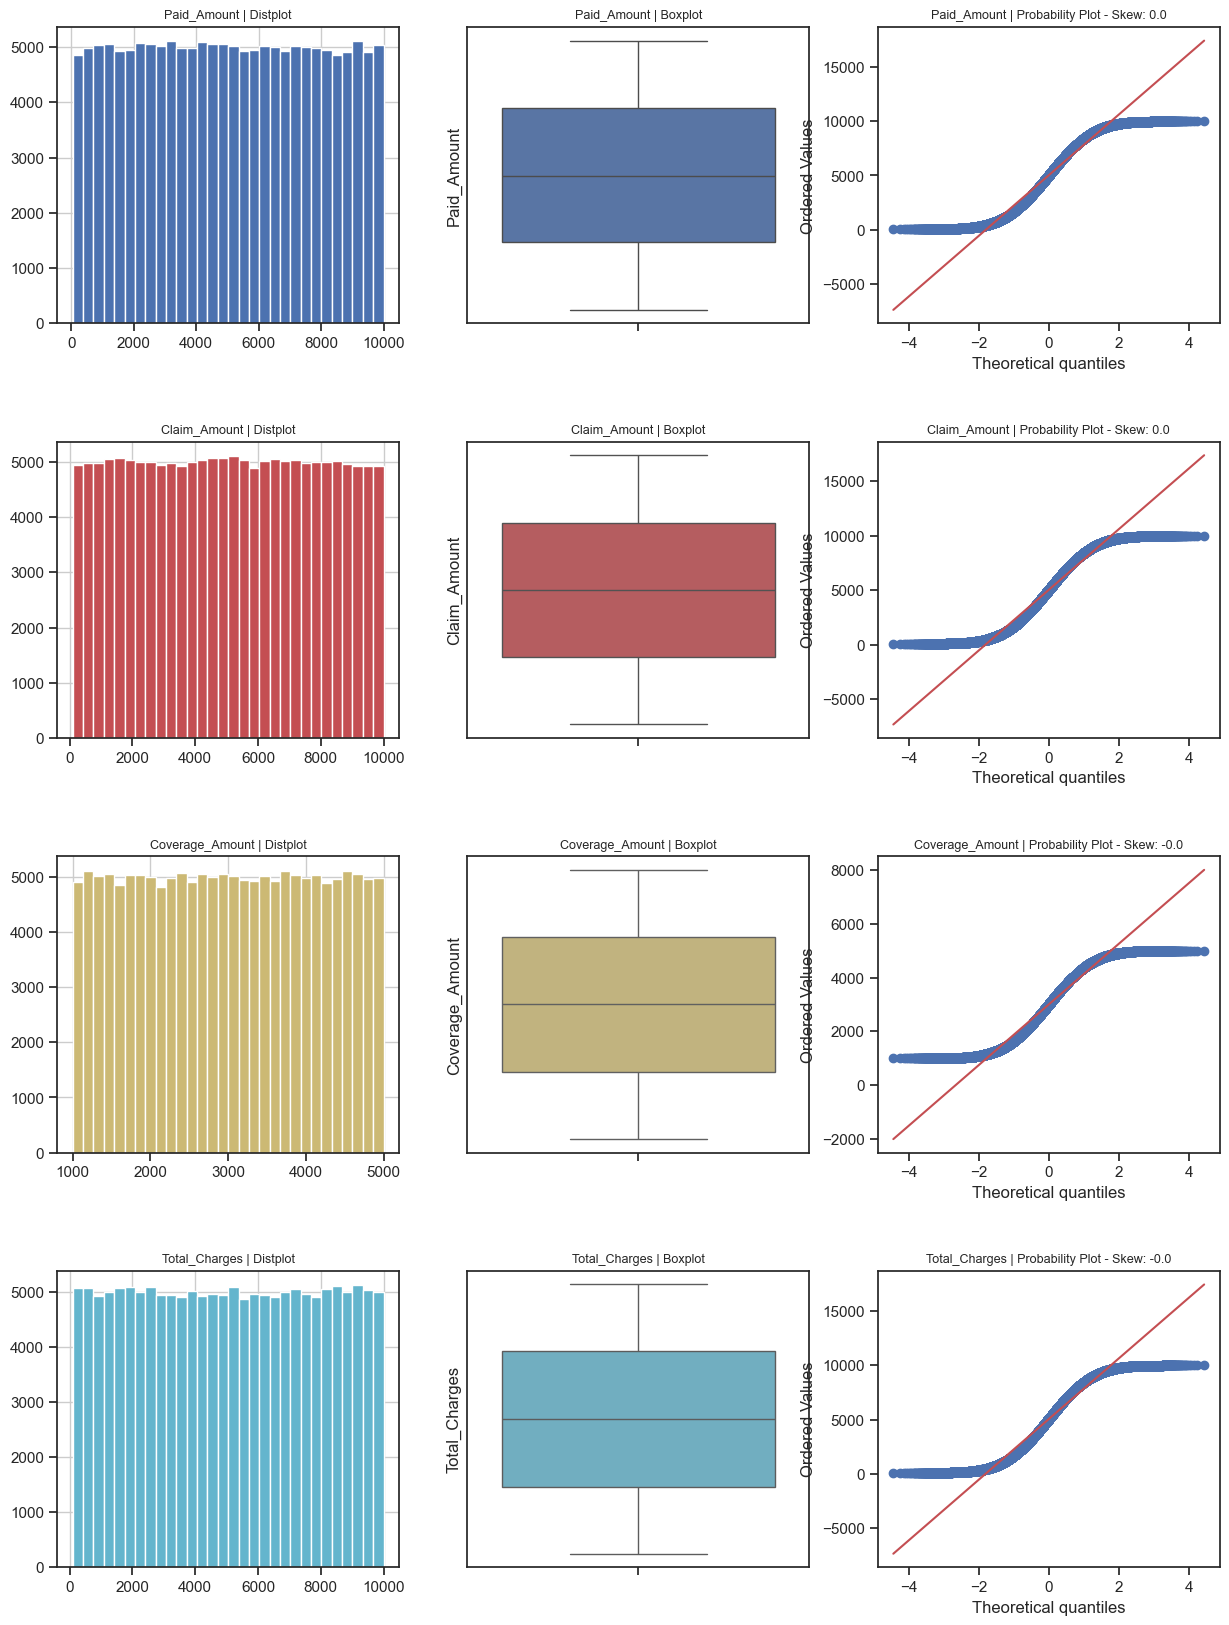

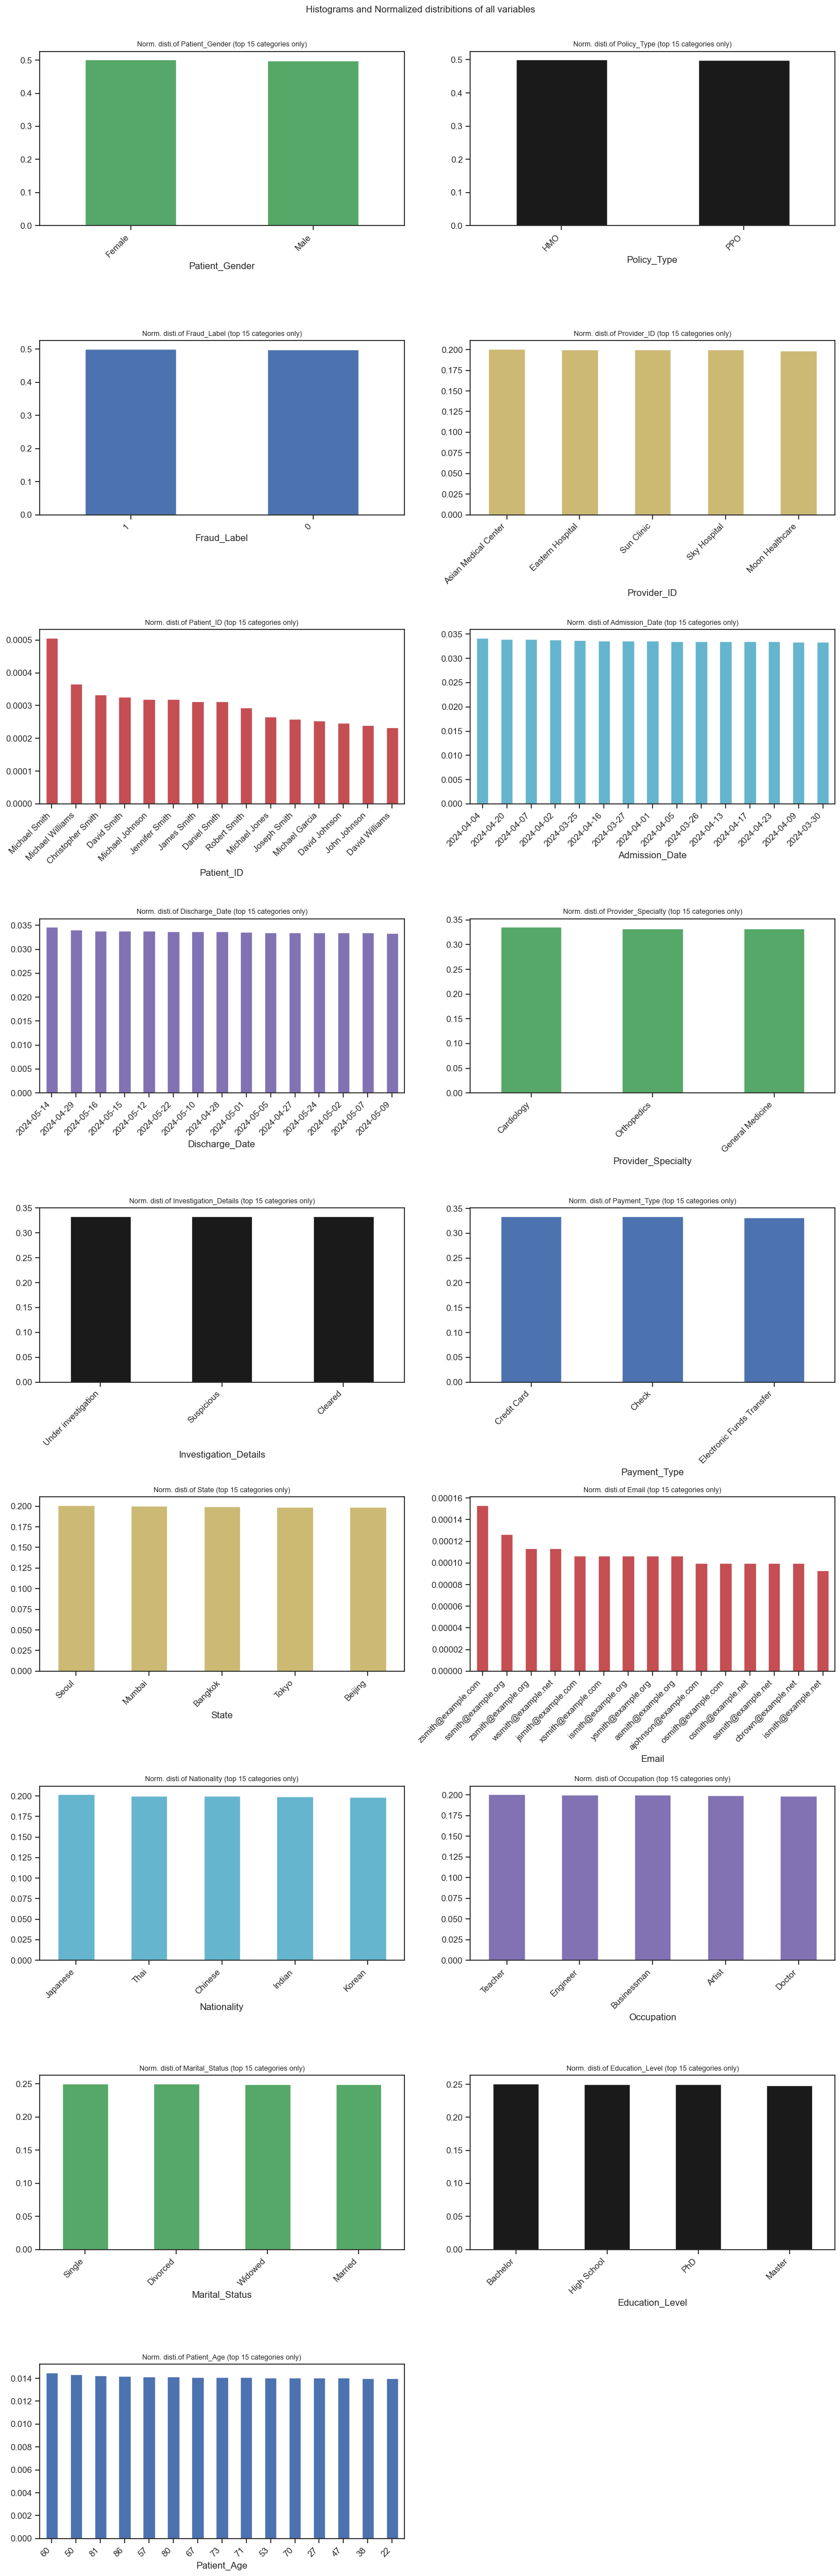

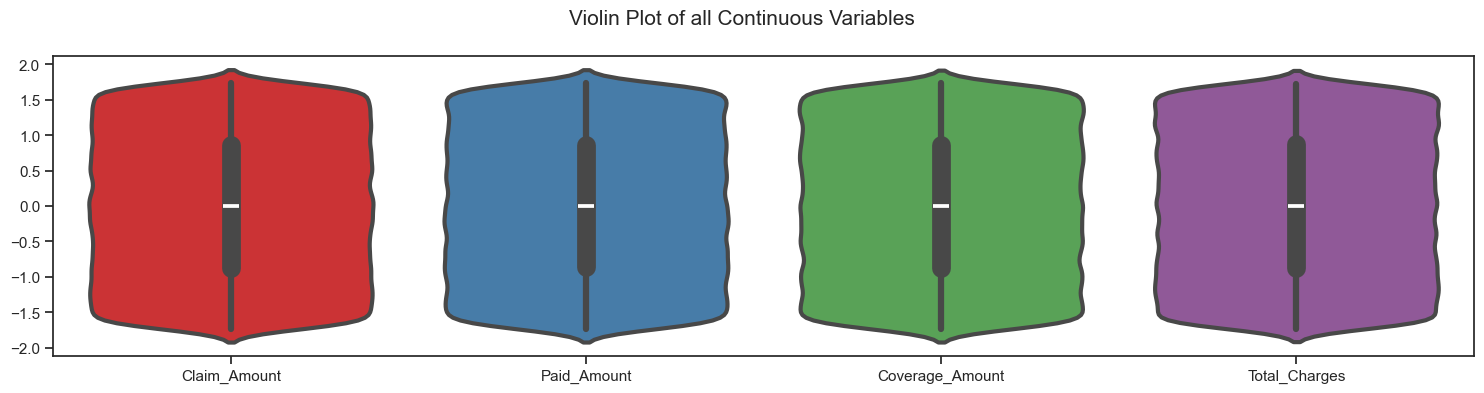

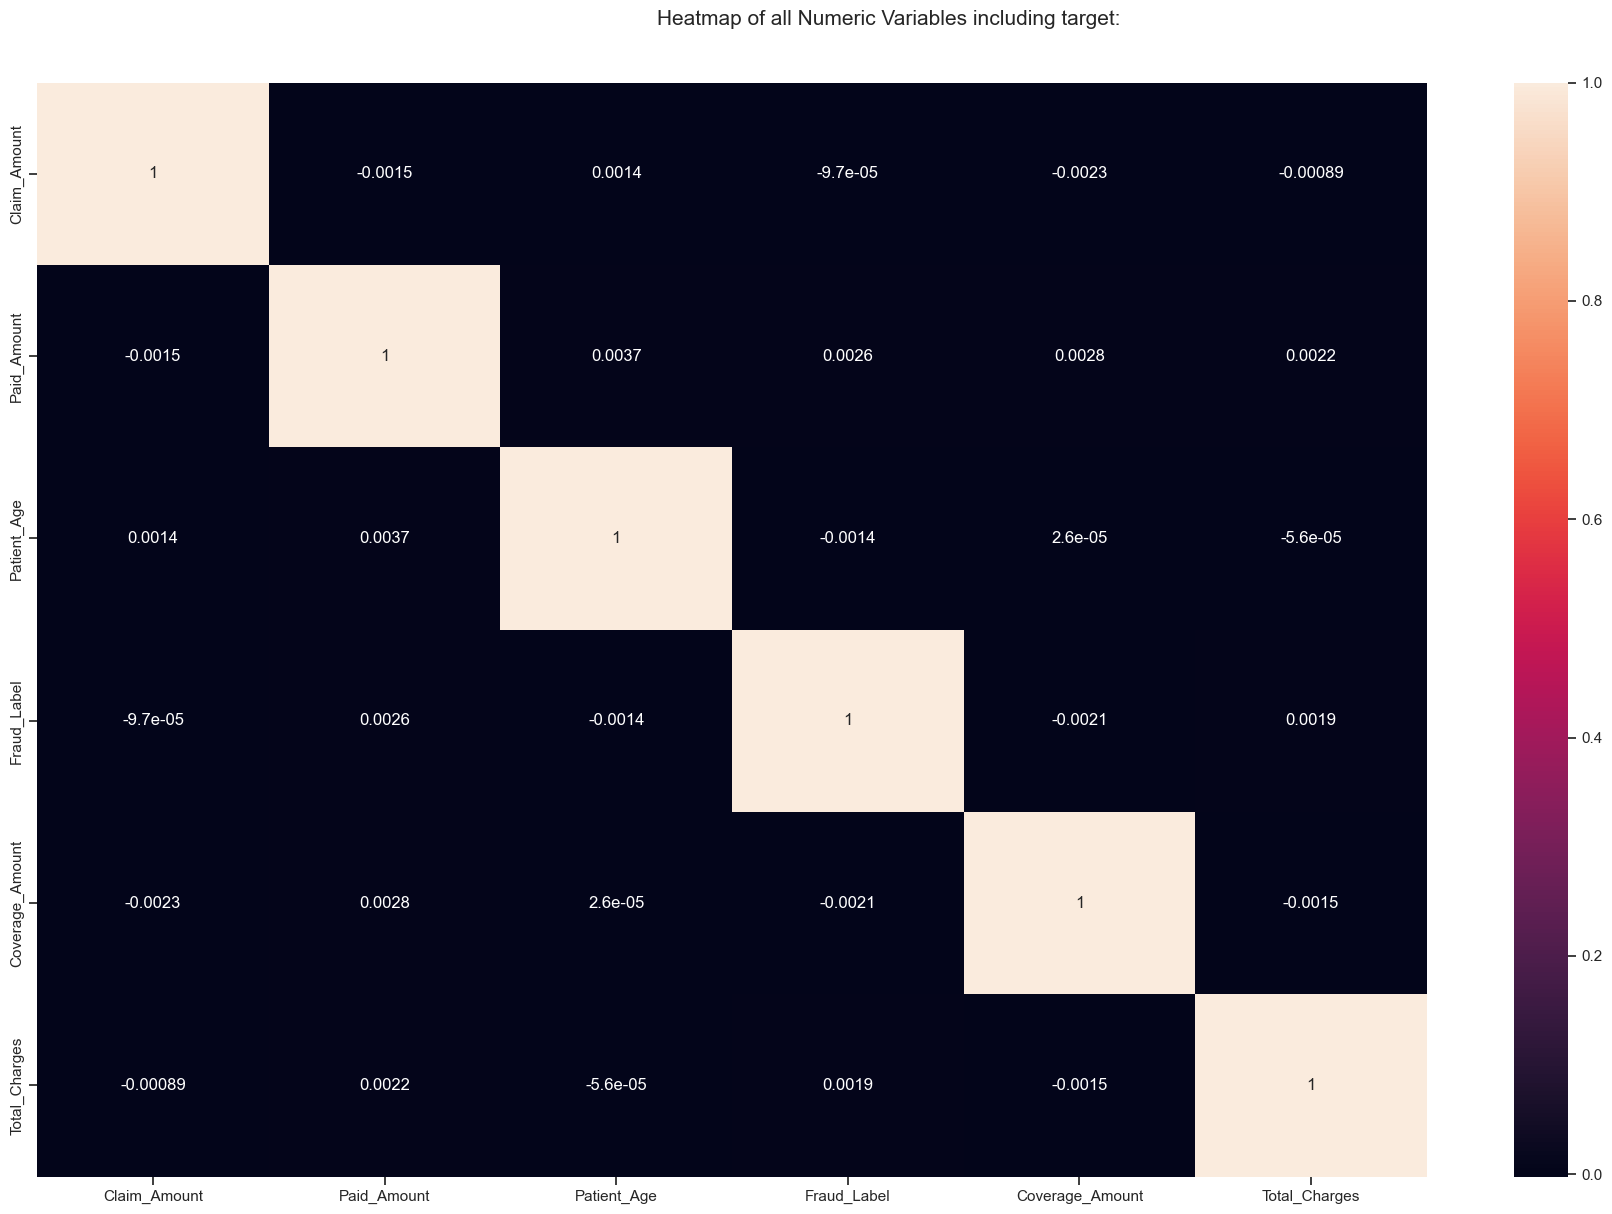

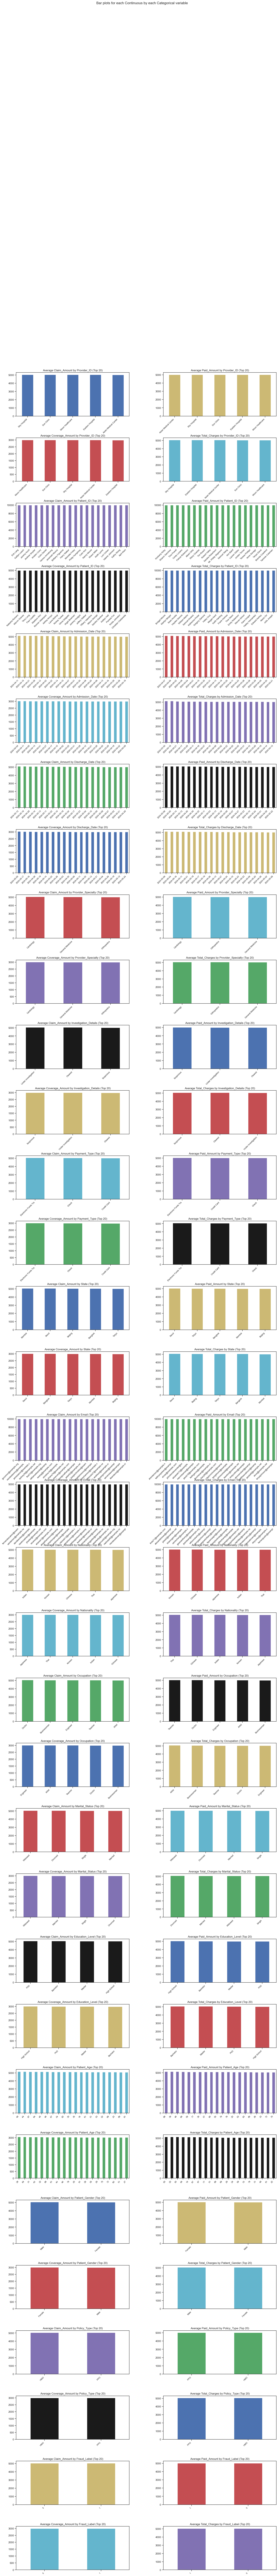

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Pushpendra.PUSHPENDRA-
[nltk_data]    |     PC.001\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Pushpendra.PUSHPENDRA-
[nltk_data]    |     PC.001\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Pushpendra.PUSHPENDRA-
[nltk_data]    |     PC.001\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Pushpendra.PUSHPENDRA-
[nltk_data]    |     PC.001\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]  

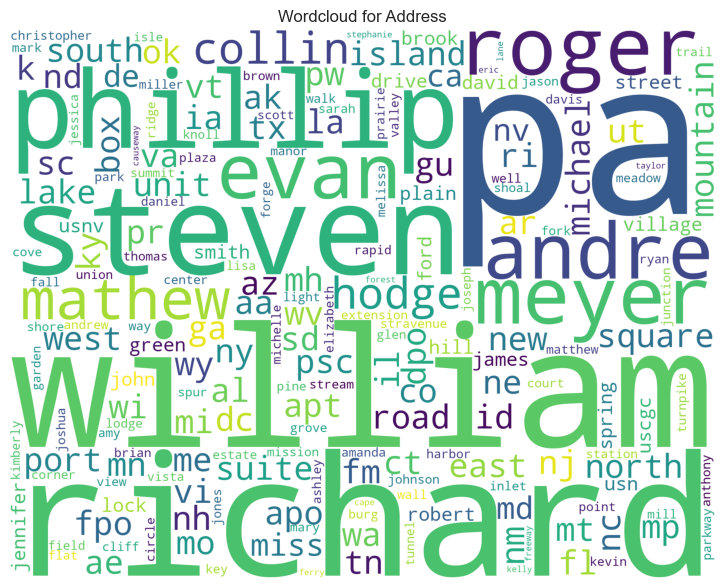

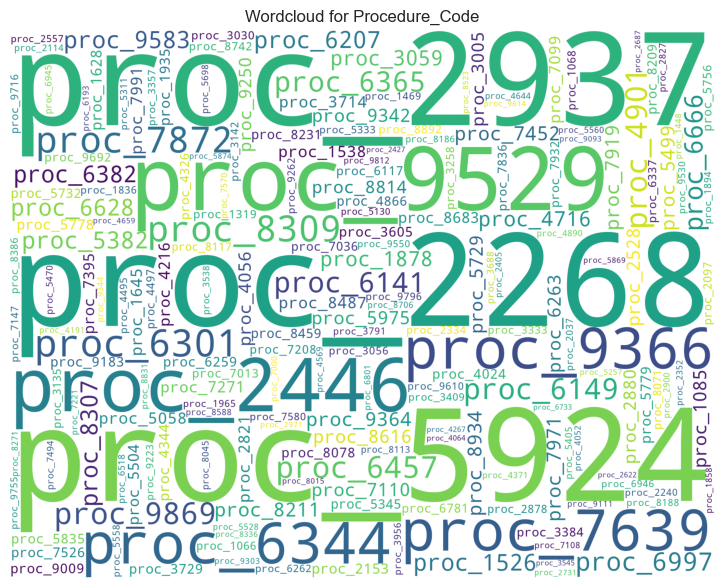

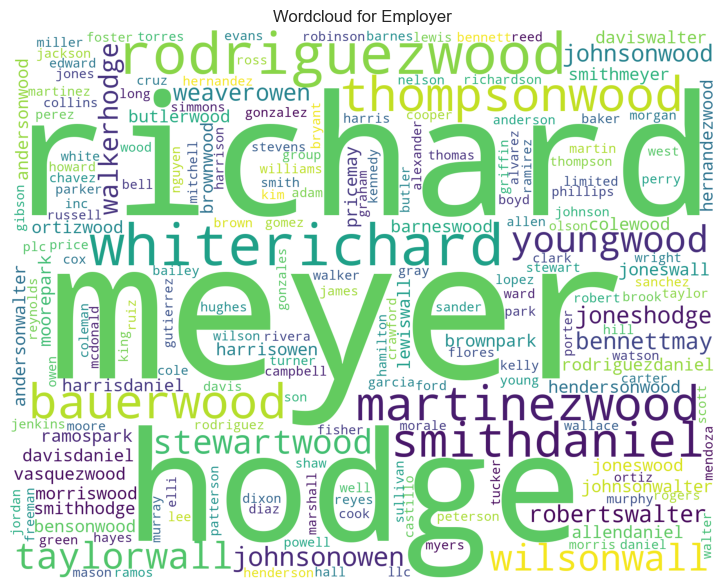

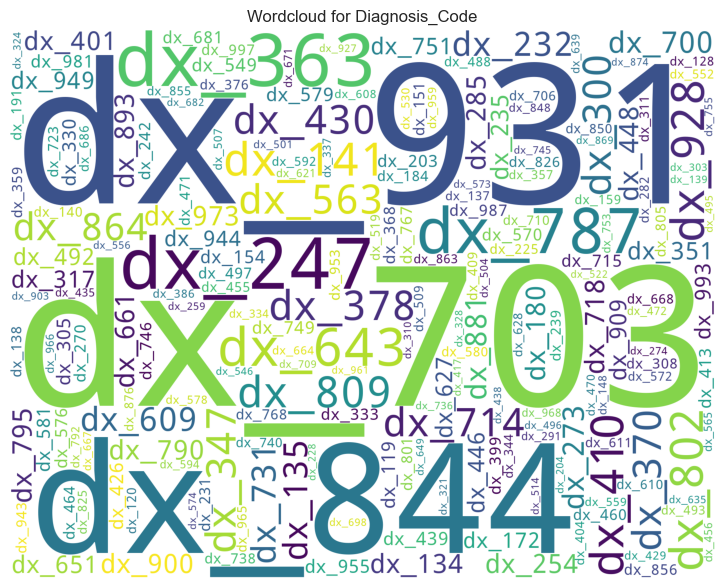

All Plots done
Time to run AutoViz = 217 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [8]:
%matplotlib inline
from autoviz import AutoViz_Class
AV = AutoViz_Class()

dft = AV.AutoViz(df, chart_format="svg")

## Analyzing the Fraud Records

In [19]:
df['Fraud_Label'].value_counts()

Fraud_Label
0    500449
1    499551
Name: count, dtype: int64

### 0 -> Genuine Data
### 1 -> Fraud Data

Text(0.5, 1.0, 'Count Plot of Fraudalent Data')

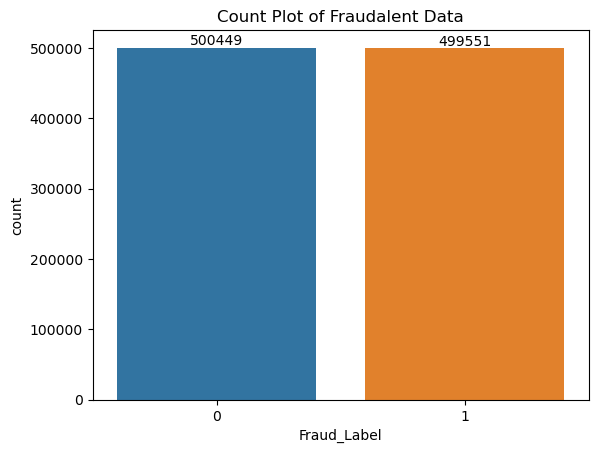

In [20]:
# Drawing Count Plot
ax = sns.countplot(data=df, x='Fraud_Label')
ax.bar_label(ax.containers[0])
plt.title('Count Plot of Fraudalent Data')

## Features and Target Creation

In [21]:
target_name = 'Fraud_Label'
feature_names = [col_name for col_name in df.columns if col_name != target_name]

In [22]:
features = df[feature_names].copy()
target = df[target_name].copy()

In [23]:
features.head()

Provider_ID Claim_ID      Patient_ID Diagnosis_Code  \
0  Asian Medical Center  CLAIM_1   Darrell Blair         DX_714   
1          Sky Hospital  CLAIM_2   William Young         DX_885   
2       Moon Healthcare  CLAIM_3  Keith Reynolds         DX_988   
3          Sky Hospital  CLAIM_4     Andre Kelly         DX_779   
4            Sun Clinic  CLAIM_5  Terry Gonzales         DX_644   

  Procedure_Code Admission_Date Discharge_Date  Claim_Amount  Paid_Amount  \
0      PROC_2648     2024-03-26     2024-05-08       1077.86      4362.78   
1      PROC_9084     2024-04-07     2024-05-03       4998.88      5867.30   
2      PROC_9747     2024-04-01     2024-05-24       7058.21      8526.15   
3      PROC_4334     2024-03-31     2024-04-27       1628.67      8317.18   
4      PROC_8408     2024-03-27     2024-05-12       1480.43      4136.33   

  Provider_Specialty  ...    State                     Email  \
0        Orthopedics  ...  Bangkok  charlenekoch@example.org   
1         Cardiology  ...   Mumbai  ayersmelanie@example.org   
2        Orthopedics  ...    Seoul     madison17@example.com   
3         Cardiology  ...    Tokyo    brittany18@example.org   
4        Orthopedics  ...   Mumbai       nharris@example.net   

            Phone_Number                                            Address  \
0           737.572.4230          9475 Christine Fort, Riveraview, TX 28683   
1  001-284-213-6827x6429            012 Martinez Bridge, Popeview, OK 75771   
2          (320)856-6983  8544 Roberts Estate Apt. 392, Port Mistyshire,...   
3           860-217-1502  52151 Antonio Hill Suite 655, Lake Christian, ...   
4           658.620.1024  7112 Christopher Village Suite 120, North Emil...   

   Nationality  Passport_Number                      Employer   Occupation  \
0       Korean      317-45-4815             Mitchell-Mcintosh      Teacher   
1       Korean      255-16-5382  Galloway, Castillo and Smith  Businessman   
2       Indian      255-07-5680   Phillips, Bryant and Murphy      Teacher   
3         Thai      210-10-2570      Lee, Jackson and Hoffman       Doctor   
4         Thai      044-28-8553     Peterson, Lopez and Blake     Engineer   

  Marital_Status Education_Level  
0       Divorced     High School  
1        Married             PhD  
2       Divorced          Master  
3       Divorced        Bachelor  
4       Divorced        Bachelor  

[5 rows x 27 columns]

In [24]:
target.head()

0    1
1    1
2    0
3    0
4    0
Name: Fraud_Label, dtype: int64

In [25]:
target.value_counts()

Fraud_Label
0    500449
1    499551
Name: count, dtype: int64

### Forming categorical and numerical columns

#### On reading and analysing the dataset, the list of categorical and numerical columns are formed.
##### Categorical Columns: 
'Provider_ID', 'Claim_ID', 'Patient_ID', 'Diagnosis_Code', 'Procedure_Code', 'Admission_Date', 'Discharge_Date', 'Provider_Specialty', 'Patient_Gender', 'Investigation_Details', 'Policy_Type', 'Payment_Type', 'State', 'Email', 'Phone_Number', 'Address', 'Nationality', 'Passport_Number', 'Employer', 'Occupation', 'Marital_Status', 'Education_Level'.

###### Numerical Columns:
'Claim_Amount', 'Paid_Amount', 'Patient_Age', 'Coverage_Amount', 'Total_Charges'.

In [26]:
#Categorical Columns Creation
categorical_cols = ['Provider_ID', 'Claim_ID', 'Patient_ID', 'Diagnosis_Code','Procedure_Code', 'Admission_Date', 
                    'Discharge_Date','Provider_Specialty', 'Patient_Gender', 'Investigation_Details','Policy_Type', 
                    'Payment_Type', 'State', 'Email', 'Phone_Number','Address', 'Nationality', 'Passport_Number', 
                    'Employer', 'Occupation','Marital_Status', 'Education_Level']
categorical_cols

['Provider_ID',
 'Claim_ID',
 'Patient_ID',
 'Diagnosis_Code',
 'Procedure_Code',
 'Admission_Date',
 'Discharge_Date',
 'Provider_Specialty',
 'Patient_Gender',
 'Investigation_Details',
 'Policy_Type',
 'Payment_Type',
 'State',
 'Email',
 'Phone_Number',
 'Address',
 'Nationality',
 'Passport_Number',
 'Employer',
 'Occupation',
 'Marital_Status',
 'Education_Level']

In [27]:
#Numerical Columns Creation
numerical_cols = ['Claim_Amount', 'Paid_Amount', 'Patient_Age','Coverage_Amount', 'Total_Charges']
numerical_cols

['Claim_Amount',
 'Paid_Amount',
 'Patient_Age',
 'Coverage_Amount',
 'Total_Charges']

### Scaling the numerical columns

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features[numerical_cols] = scaler.fit_transform(features[numerical_cols])

In [29]:
# Checking the data types of columns
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Provider_ID            1000000 non-null  object 
 1   Claim_ID               1000000 non-null  object 
 2   Patient_ID             1000000 non-null  object 
 3   Diagnosis_Code         1000000 non-null  object 
 4   Procedure_Code         1000000 non-null  object 
 5   Admission_Date         1000000 non-null  object 
 6   Discharge_Date         1000000 non-null  object 
 7   Claim_Amount           1000000 non-null  float64
 8   Paid_Amount            1000000 non-null  float64
 9   Provider_Specialty     1000000 non-null  object 
 10  Patient_Age            1000000 non-null  float64
 11  Patient_Gender         1000000 non-null  object 
 12  Investigation_Details  1000000 non-null  object 
 13  Policy_Type            1000000 non-null  object 
 14  Coverage_Amount    

In [30]:
# Converting categorical column data types to category
for col in categorical_cols:
    features[col] = features[col].astype('category')

In [31]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   Provider_ID            1000000 non-null  category
 1   Claim_ID               1000000 non-null  category
 2   Patient_ID             1000000 non-null  category
 3   Diagnosis_Code         1000000 non-null  category
 4   Procedure_Code         1000000 non-null  category
 5   Admission_Date         1000000 non-null  category
 6   Discharge_Date         1000000 non-null  category
 7   Claim_Amount           1000000 non-null  float64 
 8   Paid_Amount            1000000 non-null  float64 
 9   Provider_Specialty     1000000 non-null  category
 10  Patient_Age            1000000 non-null  float64 
 11  Patient_Gender         1000000 non-null  category
 12  Investigation_Details  1000000 non-null  category
 13  Policy_Type            1000000 non-null  category
 14  Cov

In [33]:
features[numerical_cols].head()

Claim_Amount  Paid_Amount  Patient_Age  Coverage_Amount  Total_Charges
0     -1.390600    -0.230187     1.044186         0.763088       1.702065
1     -0.017871     0.293884     0.901870        -1.263813       0.936243
2      0.703091     1.220043    -0.948242        -0.824871       1.617463
3     -1.197764     1.147253     0.190289         0.172578       0.993485
4     -1.249663    -0.309067     1.708329        -0.055276      -1.648847

### Visualization of Categorical Columns

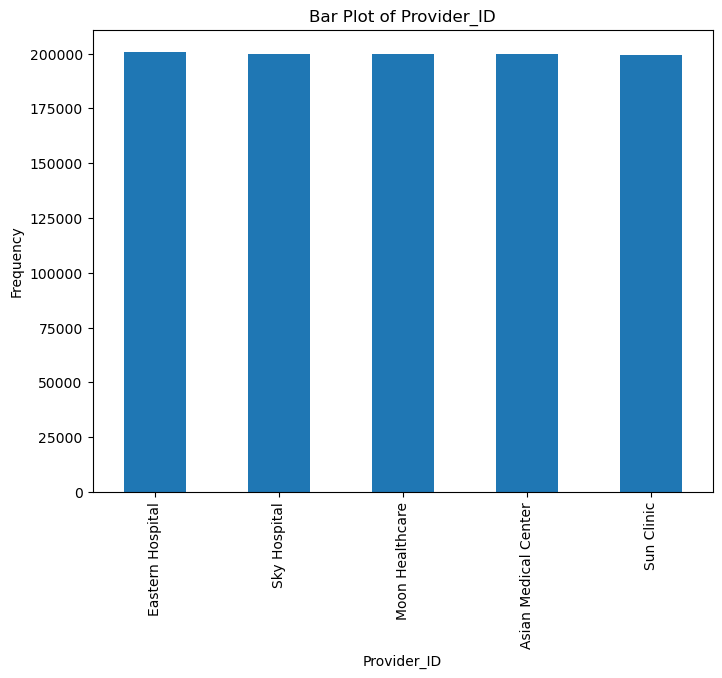


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001EBD7B46D40> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001EBDA045800> (for post_execute):



KeyboardInterrupt



In [40]:
# List of categorical columns
cat_columns = ['Provider_ID', 'Claim_ID', 'Patient_ID', 'Diagnosis_Code', 'Procedure_Code', 
               'Admission_Date', 'Discharge_Date', 'Provider_Specialty', 'Patient_Gender', 
               'Investigation_Details', 'Policy_Type', 'Payment_Type', 'State', 'Email', 
               'Phone_Number', 'Address', 'Nationality', 'Passport_Number', 'Employer', 
               'Occupation', 'Marital_Status', 'Education_Level']

# Loop through each categorical column and plot a bar plot
for col in cat_columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()